# Decision Tree Classification

In this notebook, we'll implement the Decision Tree algorithm using `sklearn` and apply it to the Titanic dataset. We'll go through each step in detail, explaining the concepts and code to ensure a thorough understanding.

## Importing Libraries

First, we'll import the necessary libraries.

In [36]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Titanic Dataset

Let's load and inspect the Titanic dataset. We'll use the dataset from Seaborn's library.

In [38]:
# Loading the Titanic dataset
titanic = sns.load_dataset('titanic')

# Displaying the first few rows of the dataset
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


## Data Preprocessing

We'll preprocess the data to handle missing values, encode categorical variables, and scale the features.

In [40]:
# Handling missing values
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'who', 'adult_male', 'alone'], axis=1)  # Dropping columns with many missing values or irrelevant columns
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Encoding categorical variables
label_encoders = {}
categorical_features = ['sex', 'embarked', 'class']
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    titanic[feature] = label_encoders[feature].fit_transform(titanic[feature])

# Displaying the first few rows of the preprocessed dataset
print(titanic.head())

   survived  pclass  sex   age  sibsp  parch     fare  embarked  class
0         0       3    1  22.0      1      0   7.2500         2      2
1         1       1    0  38.0      1      0  71.2833         0      0
2         1       3    0  26.0      0      0   7.9250         2      2
3         1       1    0  35.0      1      0  53.1000         2      0
4         0       3    1  35.0      0      0   8.0500         2      2


/var/folders/xf/_6g19cpx1kb599118n7gc7yw0000gn/T/ipykernel_29321/398861314.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
/var/folders/xf/_6g19cpx1kb599118n7gc7yw0000gn/T/ipykernel_29321/398861314.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [66]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class'],
      dtype='object')

## Splitting the Dataset

We'll split the dataset into training and testing sets to evaluate our Decision Tree model.

In [42]:
# Splitting the dataset into training and testing sets
X = titanic.drop(['survived'], axis=1).values
y = titanic['survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training the Decision Tree

Let's train our Decision Tree model on the Titanic dataset using `sklearn`'s `DecisionTreeClassifier`.

In [84]:
# Training the Decision Tree model
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [86]:
DT

DecisionTreeClassifier(random_state=42)

In [74]:
from sklearn.tree import plot_tree


[Text(0.3505743117559524, 0.9772727272727273, 'sex <= 0.5\ngini = 0.467\nsamples = 623\nvalue = [392, 231]\nclass = Not Survived'),
 Text(0.15873015873015872, 0.9318181818181818, 'pclass <= 2.5\ngini = 0.396\nsamples = 213\nvalue = [58, 155]\nclass = Survived'),
 Text(0.037698412698412696, 0.8863636363636364, 'age <= 2.5\ngini = 0.07\nsamples = 110\nvalue = [4, 106]\nclass = Survived'),
 Text(0.015873015873015872, 0.8409090909090909, 'class <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Not Survived'),
 Text(0.007936507936507936, 0.7954545454545454, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Not Survived'),
 Text(0.023809523809523808, 0.7954545454545454, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived'),
 Text(0.05952380952380952, 0.8409090909090909, 'fare <= 149.035\ngini = 0.054\nsamples = 108\nvalue = [3, 105]\nclass = Survived'),
 Text(0.03968253968253968, 0.7954545454545454, 'age <= 49.5\ngini = 0.041\nsamples = 96\nvalue = [2, 94]\nclass = Survived'),


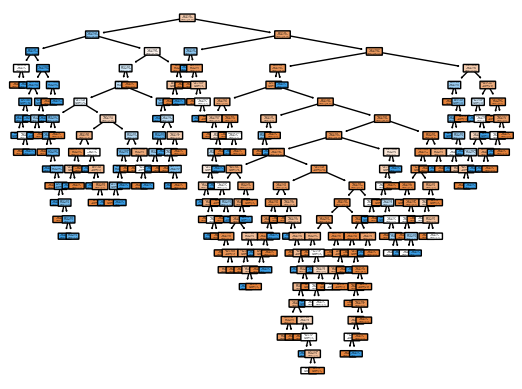

In [88]:

plot_tree(DT, feature_names=titanic.drop(['survived'], axis=1).columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)




## Evaluating the Model

We'll evaluate the model using accuracy, confusion matrix, and classification report.

In [91]:
# Making predictions on the test set
y_pred = DT.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy: 0.746268656716418

Confusion Matrix:
[[124  33]
 [ 35  76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       157
           1       0.70      0.68      0.69       111

    accuracy                           0.75       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



## Hyperparameter Tuning

We'll use `GridSearchCV` to find the best hyperparameters for our Decision Tree model.

In [124]:
# Defining the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6,7 ,8,9, 10, 12,15,18],
    'min_samples_split': [2, 5, 10, 20]
}

# Performing grid search with cross-validation
grid_search = GridSearchCV(estimator=DT, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Displaying the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2}
Best Score: 0.8154451612903226


In [102]:
grid_search.

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

## Visualizing the Decision Tree

We'll visualize the decision tree to understand how it makes decisions.

In [98]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

In [134]:
from sklearn.tree import plot_tree

# Visualizing the decision tree
best_tree = grid_search.best_estimator_
plt.figure(figsize=(200, 100),dpi=100)
plot_tree(best_tree, feature_names=titanic.drop(['survived'], axis=1).columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.show()
# plt.savefig("titanic ka best tree.png")

In [144]:
titanic.head()

survived  pclass  sex   age  sibsp  parch     fare  embarked  class
0         0       3    1  22.0      1      0   7.2500         2      2
1         1       1    0  38.0      1      0  71.2833         0      0
2         1       3    0  26.0      0      0   7.9250         2      2
3         1       1    0  35.0      1      0  53.1000         2      0
4         0       3    1  35.0      0      0   8.0500         2      2

In [137]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [141]:
# Making predictions on the test set
y_pred = rf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy: 0.7649253731343284

Confusion Matrix:
[[129  28]
 [ 35  76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       157
           1       0.73      0.68      0.71       111

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.76       268
weighted avg       0.76      0.76      0.76       268



## Conclusion

In this notebook, we implemented the Decision Tree algorithm using `sklearn` and applied it to the Titanic dataset. We visualized the dataset, preprocessed the data, trained the model, evaluated its performance, and performed hyperparameter tuning. Finally, we visualized the decision tree to understand how it makes decisions.

In [158]:
X.shape

(891, 8)

In [152]:
# Splitting the dataset into training and testing sets
X = titanic.drop(['survived'], axis=1).values
y = titanic['survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [162]:
X_dash,y_dash, = X[100:800], y[100:800]


In [164]:
X_dash_2,y_dash_2 = X[0:700],y[0:700]

In [214]:
dt1,dt2 = DecisionTreeClassifier(),DecisionTreeClassifier()

# Defining the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6,7 ,8,9, 10, 12,15,18],
    'min_samples_split': [2, 5, 10, 20]
}

# Performing grid search with cross-validation
grid_search1 = GridSearchCV(estimator=dt1, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
grid_search1.fit(X_dash, y_dash)

# Displaying the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')
# Defining the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6,7 ,8,9, 10, 12,15,18],
    'min_samples_split': [2, 5, 10, 20]
}

# Performing grid search with cross-validation
grid_search2 = GridSearchCV(estimator=dt2, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
grid_search2.fit(X_dash_2, y_dash_2)

# Displaying the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 20}
Best Score: 0.8142857142857144
Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 20}
Best Score: 0.8142857142857144


In [220]:
# Making predictions on the test set
y_pred = grid_search1.best_estimator_.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8283582089552238

Confusion Matrix:
[[143  14]
 [ 32  79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       157
           1       0.85      0.71      0.77       111

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



In [222]:
# Making predictions on the test set
y_pred = grid_search2.best_estimator_.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy: 0.835820895522388

Confusion Matrix:
[[150   7]
 [ 37  74]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       157
           1       0.91      0.67      0.77       111

    accuracy                           0.84       268
   macro avg       0.86      0.81      0.82       268
weighted avg       0.85      0.84      0.83       268



In [186]:
n1 = np.array([[1,2,3],[4,5,6]])
n1.shape

n1.reshape(1,-1)

array([[[1, 2, 3, 4, 5, 6]]])

In [190]:
dt1.predict(X_test[0].reshape(1, -1))[0]

1

In [192]:
dt2.predict(X_test[0].reshape(1, -1))[0]

1

[Text(0.353240536971831, 0.9736842105263158, 'sex <= 0.5\ngini = 0.472\nsamples = 700\nvalue = [433, 267]\nclass = Not Survived'),
 Text(0.16846390845070422, 0.9210526315789473, 'class <= 1.5\ngini = 0.387\nsamples = 244\nvalue = [64, 180]\nclass = Survived'),
 Text(0.03873239436619718, 0.868421052631579, 'age <= 3.0\ngini = 0.098\nsamples = 135\nvalue = [7, 128]\nclass = Survived'),
 Text(0.014084507042253521, 0.8157894736842105, 'fare <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Not Survived'),
 Text(0.007042253521126761, 0.7631578947368421, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived'),
 Text(0.02112676056338028, 0.7631578947368421, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Not Survived'),
 Text(0.06338028169014084, 0.8157894736842105, 'fare <= 13.25\ngini = 0.086\nsamples = 133\nvalue = [6, 127]\nclass = Survived'),
 Text(0.035211267605633804, 0.7631578947368421, 'age <= 53.5\ngini = 0.236\nsamples = 22\nvalue = [3, 19]\nclass = Survived'),
 Te

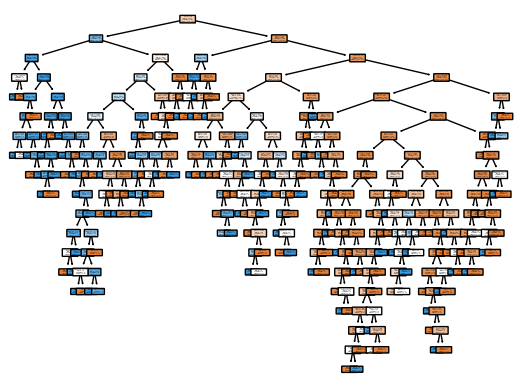

In [194]:

plot_tree(dt1, feature_names=titanic.drop(['survived'], axis=1).columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)


